In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_html('https://www.athletic.net/CrossCountry/Division/List.aspx?DivID=65066')

HTTPError: HTTP Error 403: Forbidden

In [3]:
import requests

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get("https://www.athletic.net/CrossCountry/Division/List.aspx?DivID=65066", headers=header)

dfs = pd.read_html(r.text)

In [4]:
df = pd.DataFrame(dfs[0])

In [14]:
df.head()

,0,1,2,3,4,5,6,7,8
0,NaN,NaN,NaN,Athlete,Time,ST,Team,Date,Meet
1,NaN,1.0,11.0,Evan Stevens,15:38.4PR,MO,Webb City,Sep 17,Missouri Southern Stampede
2,NaN,2.0,12.0,Josh Allison,15:50.6,MO,Hillsboro,Sep 2,First Capitol XC Meet
3,NaN,3.0,10.0,Liam Adair,15:50.9PR,MO,Smithville,Sep 17,Missouri Southern Stampede
4,NaN,4.0,11.0,Isaac Rivera,15:56.4PR,MO,Lincoln College Prep,Sep 1,Greg Wilson Classic


In [5]:
df.drop(axis=1, columns=[0], inplace=True)

In [6]:

df

,1,2,3,4,5,6,7,8
0,NaN,NaN,Athlete,Time,ST,Team,Date,Meet
1,1.0,11.0,Evan Stevens,15:38.4PR,MO,Webb City,Sep 17,Missouri Southern Stampede
2,2.0,12.0,Josh Allison,15:50.6,MO,Hillsboro,Sep 2,First Capitol XC Meet
3,3.0,10.0,Liam Adair,15:50.9PR,MO,Smithville,Sep 17,Missouri Southern Stampede
4,4.0,11.0,Isaac Rivera,15:56.4PR,MO,Lincoln College Prep,Sep 1,Greg Wilson Classic
...,...,...,...,...,...,...,...,...
96,96.0,10.0,Tanner Jenks,18:20.5PR,MO,Platte County,Sep 3,Tim Nixon Invitational
97,NaN,10.0,Thomas Pratz,18:20.5PR,MO,Rolla,Sep 10,Lebanon Invitational
98,98.0,11.0,Joshua Schnurbusch,18:21.3PR,MO,Notre Dame (Cape Girardeau),Sep 17,Cape Central XC Invitational
99,99.0,11.0,James Warner,18:22.4,MO,St. Charles,Sep 2,First Capitol XC Meet


In [12]:
df.unqiue([4])

AttributeError: 'DataFrame' object has no attribute 'unqiue'

In [14]:
df[6].unique()

array(['Team', 'Webb City', 'Hillsboro', 'Smithville',
       'Lincoln College Prep', 'St. Charles West', 'Rolla',
       'Platte County', 'Central (Cape Girardeau)', 'Festus', 'Bolivar',
       'West Plains', 'Monett', 'Farmington', 'Marshfield',
       'Ft. Zumwalt North', 'St. Charles', 'Windsor (Imperial)',
       'Notre Dame (Cape Girardeau)', 'Union', 'Parkway Central',
       'Camdenton', 'Willard', 'Ft. Zumwalt East', 'North County',
       'Warrensburg', 'Pacific', 'Whitfield', 'Desoto', 'Kearney',
       'Mexico', 'Sullivan', 'St. Vincent', 'Hannibal', 'Warrenton',
       'Carl Junction', 'William Chrisman'], dtype=object)

In [18]:
df[4].unique()

array(['Time', '15:38.4PR', '15:50.6', '15:50.9PR', '15:56.4PR',
       '16:02.9PR', '16:11.7PR', '16:15.0', '16:26.1', '16:26.3PR',
       '16:33.7', '16:35.2PR', '16:36.0PR', '16:41.0', '16:43.5',
       '16:46.8', '16:46.9PR', '16:48.0PR', '16:49.4PR', '16:49.6PR',
       '16:54.4PR', '16:55.2PR', '17:02.5PR', '17:03.2PR', '17:05.3',
       '17:06.9', '17:07.7', '17:09.1', '17:11.3', '17:12.4PR',
       '17:12.6PR', '17:14.0', '17:17.3PR', '17:19.1', '17:22.6PR',
       '17:23.5', '17:25.4', '17:28.5PR', '17:30.2PR', '17:31.5PR',
       '17:32.4PR', '17:33.6PR', '17:34.6PR', '17:36.3', '17:36.7PR',
       '17:37.3PR', '17:37.9PR', '17:38.3PR', '17:38.8PR', '17:42.0PR',
       '17:43.7', '17:44.2PR', '17:47.1', '17:48.2', '17:49.5PR',
       '17:51.3', '17:52.1PR', '17:52.8', '17:54.9', '17:55.3PR',
       '17:55.7', '17:56.2PR', '17:56.8PR', '17:58.1', '17:59.7PR',
       '18:00.4PR', '18:00.4', '18:00.5', '18:02.9PR', '18:04.2',
       '18:04.3', '18:04.3PR', '18:04.8PR', '18:05.7'

In [10]:
df[4] = df[4].map(lambda x: x.strip('PR'))

In [11]:
df[4].unique()

array(['Time', '15:38.4', '15:50.6', '15:50.9', '15:56.4', '16:02.9',
       '16:11.7', '16:15.0', '16:26.1', '16:26.3', '16:33.7', '16:35.2',
       '16:36.0', '16:41.0', '16:43.5', '16:46.8', '16:46.9', '16:48.0',
       '16:49.4', '16:49.6', '16:54.4', '16:55.2', '17:02.5', '17:03.2',
       '17:05.3', '17:06.9', '17:07.7', '17:09.1', '17:11.3', '17:12.4',
       '17:12.6', '17:14.0', '17:17.3', '17:19.1', '17:22.6', '17:23.5',
       '17:25.4', '17:28.5', '17:30.2', '17:31.5', '17:32.4', '17:33.6',
       '17:34.6', '17:36.3', '17:36.7', '17:37.3', '17:37.9', '17:38.3',
       '17:38.8', '17:42.0', '17:43.7', '17:44.2', '17:47.1', '17:48.2',
       '17:49.5', '17:51.3', '17:52.1', '17:52.8', '17:54.9', '17:55.3',
       '17:55.7', '17:56.2', '17:56.8', '17:58.1', '17:59.7', '18:00.4',
       '18:00.5', '18:02.9', '18:04.2', '18:04.3', '18:04.8', '18:05.7',
       '18:06.8', '18:07.4', '18:07.8', '18:08.0', '18:08.1', '18:08.3',
       '18:09.0', '18:09.6', '18:11.3', '18:11.4', '18

In [12]:
df

,1,2,3,4,5,6,7,8
0,NaN,NaN,Athlete,Time,ST,Team,Date,Meet
1,1.0,11.0,Evan Stevens,15:38.4,MO,Webb City,Sep 17,Missouri Southern Stampede
2,2.0,12.0,Josh Allison,15:50.6,MO,Hillsboro,Sep 2,First Capitol XC Meet
3,3.0,10.0,Liam Adair,15:50.9,MO,Smithville,Sep 17,Missouri Southern Stampede
4,4.0,11.0,Isaac Rivera,15:56.4,MO,Lincoln College Prep,Sep 1,Greg Wilson Classic
...,...,...,...,...,...,...,...,...
96,96.0,10.0,Tanner Jenks,18:20.5,MO,Platte County,Sep 3,Tim Nixon Invitational
97,NaN,10.0,Thomas Pratz,18:20.5,MO,Rolla,Sep 10,Lebanon Invitational
98,98.0,11.0,Joshua Schnurbusch,18:21.3,MO,Notre Dame (Cape Girardeau),Sep 17,Cape Central XC Invitational
99,99.0,11.0,James Warner,18:22.4,MO,St. Charles,Sep 2,First Capitol XC Meet


In [17]:
df.drop(axis=1, columns=[1], inplace=True)

<AxesSubplot:xlabel='4', ylabel='6'>

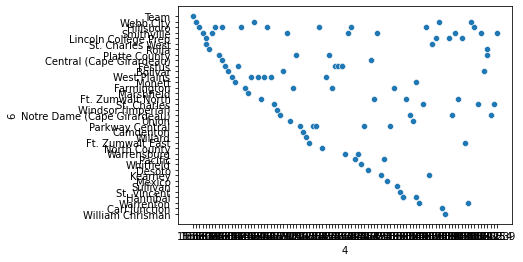